In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import confusion_matrix, precision_recall_fscore_support
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras import layers, models
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import SGD, Adam, RMSprop
from importlib import reload
import pydot

In [2]:
# Load the Fashion MNIST dataset
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [3]:
# Preprocess the data
x_train = x_train.reshape((60000, 784)) / 255.0
x_test = x_test.reshape((10000, 784)) / 255.0

x_valid, x_train = x_train[:10000], x_train[10000:]
y_valid, y_train = y_train[:10000], y_train[10000:]

y_train_onehot = to_categorical(y_train, num_classes=10)
y_valid_onehot = to_categorical(y_valid, num_classes=10)
y_test_onehot = to_categorical(y_test, num_classes=10)

In [4]:
# Set random seeds for reproducibility
np.random.seed(0)
tf.random.set_seed(0)

In [5]:
# Define a function for model architecture
def create_model(first_hidden_neurons, second_hidden_neurons, first_hidden_activation, second_hidden_activation, final_hidden_activation):
    model = models.Sequential()
    model.add(layers.Flatten(input_shape=(784,)))
    model.add(layers.Dense(first_hidden_neurons, activation=first_hidden_activation))
    model.add(layers.Dense(second_hidden_neurons, activation=second_hidden_activation))
    model.add(layers.Dense(10, activation=final_hidden_activation))
    return model

In [6]:
# Define a function for model compilation and training
def compile_and_train_model(model, loss, optimizer, batch_size, epochs, callbacks):
    model.compile(loss=loss, optimizer=optimizer, metrics=['accuracy'])
    history = model.fit(x_train, y_train_onehot, epochs=epochs, batch_size=batch_size, validation_data=(x_valid, y_valid_onehot), callbacks=callbacks)
    return history

In [7]:
# Define a function to plot loss and accuracy curves
def plot_training_curves(history):
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    accuracy = history.history['accuracy']
    val_accuracy = history.history['val_accuracy']

    plt.figure(figsize=(12, 4))

    plt.subplot(1, 2, 1)
    plt.plot(loss, label='Training Loss')
    plt.plot(val_loss, label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(accuracy, label='Training Accuracy')
    plt.plot(val_accuracy, label='Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.show()

In [8]:
# Define a function for model evaluation
def evaluate_model(model):
    test_loss, test_accuracy = model.evaluate(x_test, y_test_onehot)
    y_prob = model.predict(x_test)
    y_pred = y_prob.argmax(axis=-1)
    cnf = confusion_matrix(y_test, y_pred)
    prf = precision_recall_fscore_support(y_test, y_pred, average='macro')

    print('Test Loss: {:.4f}'.format(test_loss))
    print('Test Accuracy: {:.4f}'.format(test_accuracy))
    print('Confusion Matrix:\n', cnf)
    print('F1-Score: {:.4f}'.format(prf[2]))
    print('Recall: {:.4f}'.format(prf[1]))
    print('Precision: {:.4f}'.format(prf[0]))

In [9]:
# Define a function to visualize model architecture
def visualize_model(model):
    tf.keras.utils.plot_model(
        model,
        show_shapes=True,
        show_dtype=True,
        show_layer_names=False,
        rankdir="LR",
        expand_nested=True,
        dpi=96,
    )

In [10]:
# Define a list of model configurations to test
model_configs = [
    (50, 50, 'relu', 'relu', 'softmax'),
    (100, 100, 'relu', 'relu', 'softmax'),
    (150, 150, 'relu', 'relu', 'softmax')
]

Model Configuration:
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 50)                39250     
                                                                 
 dense_1 (Dense)             (None, 50)                2550      
                                                                 
 dense_2 (Dense)             (None, 10)                510       
                                                                 
Total params: 42,310
Trainable params: 42,310
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
1563/1563 [==============================] - 8s 4ms/step - loss: 1.7872 - accuracy: 0.4663 - val_loss: 1.3213 - val_accuracy: 0.6455
Epoch 2/100
1563/1

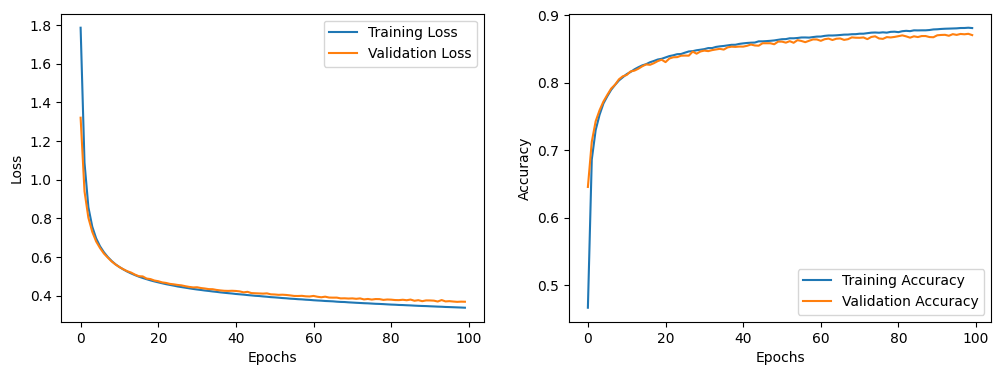

313/313 [==============================] - 1s 2ms/step
Test Loss: 0.3955
Test Accuracy: 0.8584
Confusion Matrix:
 [[869   0  13  33   4   0  70   0  11   0]
 [  3 957   4  26   4   0   5   0   1   0]
 [ 24   1 764  14 131   1  60   0   5   0]
 [ 35  12  14 863  40   0  31   0   5   0]
 [  1   0  89  33 797   1  71   0   8   0]
 [  0   0   0   1   0 936   0  38   3  22]
 [179   2 103  35  98   1 563   0  19   0]
 [  0   0   0   0   0  26   0 934   0  40]
 [  7   1   8   8   5   3  10   5 953   0]
 [  0   0   0   0   0   8   0  43   1 948]]
F1-Score: 0.8568
Recall: 0.8584
Precision: 0.8575
Model Configuration:
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_3 (Dense)             (None, 100)               78500     
                                

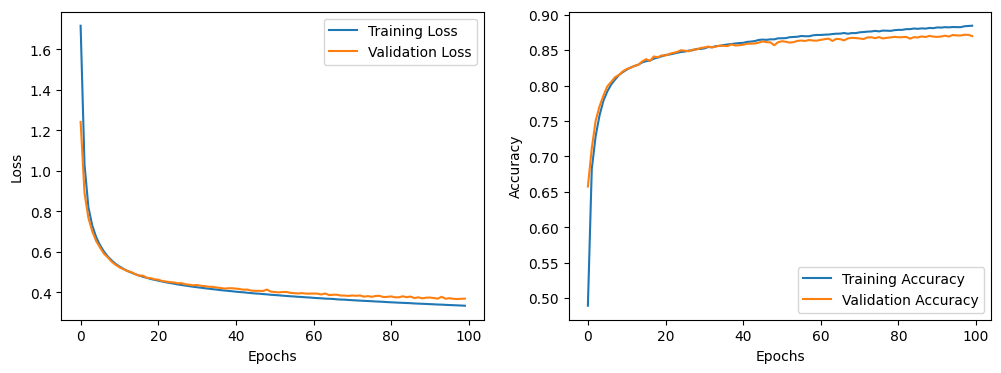

313/313 [==============================] - 1s 2ms/step
Test Loss: 0.3923
Test Accuracy: 0.8634
Confusion Matrix:
 [[863   1  16  37   3   1  64   0  15   0]
 [  5 958   2  27   5   0   2   0   1   0]
 [ 28   1 765  15 133   1  52   0   5   0]
 [ 40  10  14 875  33   1  20   0   7   0]
 [  1   1  84  32 827   1  46   0   8   0]
 [  0   0   0   1   0 940   0  39   4  16]
 [177   2 111  38  89   1 559   0  23   0]
 [  0   0   0   0   0  27   0 942   0  31]
 [ 10   1   5   8   5   3   7   5 956   0]
 [  0   0   0   0   0   6   0  44   1 949]]
F1-Score: 0.8613
Recall: 0.8634
Precision: 0.8629
Model Configuration:
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_6 (Dense)             (None, 150)               117750    
                                

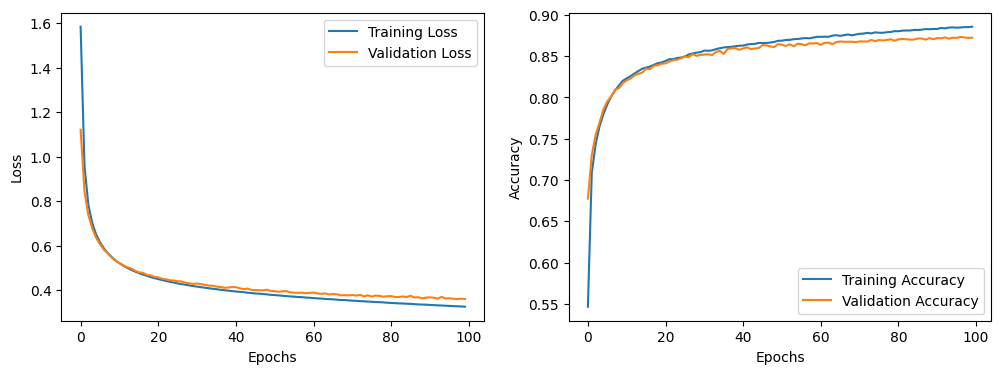

313/313 [==============================] - 1s 2ms/step
Test Loss: 0.3846
Test Accuracy: 0.8660
Confusion Matrix:
 [[859   1  14  39   5   2  69   0  11   0]
 [  5 962   2  24   4   0   2   0   1   0]
 [ 24   3 753  14 128   1  70   0   7   0]
 [ 32   9  12 878  37   0  26   0   6   0]
 [  0   0  86  31 825   0  53   0   5   0]
 [  0   0   0   1   0 938   0  41   3  17]
 [171   1  93  34  90   1 592   0  18   0]
 [  0   0   0   0   0  25   0 944   0  31]
 [  8   1   3   6   6   2   7   6 961   0]
 [  0   0   0   0   0   7   0  44   1 948]]
F1-Score: 0.8646
Recall: 0.8660
Precision: 0.8653


In [11]:
# Train and evaluate models with different configurations
for config in model_configs:
    first_hidden_neurons, second_hidden_neurons, first_hidden_activation, second_hidden_activation, final_hidden_activation = config
    model = create_model(first_hidden_neurons, second_hidden_neurons, first_hidden_activation, second_hidden_activation, final_hidden_activation)
    print("Model Configuration:")
    model.summary()
    callback = EarlyStopping(monitor='val_accuracy', patience=10, restore_best_weights=True)
    history = compile_and_train_model(model, 'categorical_crossentropy', SGD(learning_rate=0.001), batch_size=32, epochs=100, callbacks=[callback])
    plot_training_curves(history)
    evaluate_model(model)
    visualize_model(model)